In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_read = pd.read_csv(city_data_to_load)
#city_data_read.head()
ride_data_read = pd.read_csv(ride_data_to_load)
#ride_data_read.head()

merge = pd.merge(city_data_read,ride_data_read,on="city")
# Combine the data into a single dataset
city_data = city_data_read.drop_duplicates("city" , keep="first")
ride_data = ride_data_read.drop_duplicates("city")

combined_data = pd.merge(city_data, ride_data,on="city")
#city_data_read.head()
# Display the data table for preview
combined_data.head()
#city_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
2,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
3,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
4,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354


## Bubble Plot of Ride Sharing Data

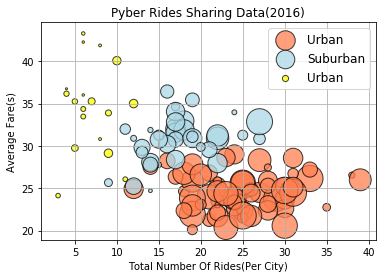

In [17]:
# Obtain the x and y coordinates for each of the three city types
urban_city = merge.loc[(merge["type"]== "Urban")]
suburban_city = merge.loc[(merge["type"]== "Suburban")]
rural_city = merge.loc[merge["type"]=="Rural"]

# Build the scatter plots for each city types
#Average Fares per city
avg_fare_urban_city = urban_city.groupby(["city"])["fare"].mean()
avg_fare_urban_city
avg_fare_suburban_city = suburban_city.groupby(["city"])["fare"].mean()
avg_fare_rural_city = rural_city.groupby(["city"])["fare"].mean()

#Total Number of Rides Per City
total_rides_urban_city = urban_city.groupby(["city"])["ride_id"].count()
total_rides_suburban_city = suburban_city.groupby(["city"])["ride_id"].count()
total_rides_rural_city = rural_city.groupby(["city"])["ride_id"].count()

#Total Drivers Per City for size
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].mean()
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].sum()
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].sum()
#total_drivers_urben = urben_city.groupby(["city"])["driver_count"].value_counts()
plt.scatter(total_rides_urban_city,
            avg_fare_urban_city,
            s=total_drivers_urban_city*10,
            marker ="o",
            facecolors ="coral",
            edgecolors ="black",
            alpha =0.75,
            label ="Urban")
plt.scatter(total_rides_suburban_city,
            avg_fare_suburban_city,
            s=total_drivers_suburban_city,
            marker ="o",
            facecolors ="lightblue",
            edgecolors ="black",
            alpha =0.75,
            label ="Suburban")
plt.scatter(total_rides_rural_city,
            avg_fare_rural_city,
            s=total_drivers_rural_city,
            marker ="o",
            facecolors ="yellow",
            edgecolors ="black",
            alpha =0.75,
            label ="Urban")
#plt.xlim(0,40)
# Incorporate the other graph properties
plt.title("Pyber Rides Sharing Data(2016)")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average Fare(s)")
# Create a legend
plt.legend(fontsize=12)
plt.grid()

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/Pyber Ride Sharing data.png")

In [18]:
# Show plot
plt.show()

## Total Fares by City Type

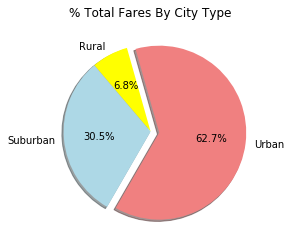

In [19]:
# Calculate Type Percents


total_fares = merge["fare"].sum()
total_fare_urban = urban_city["fare"].sum()
total_fare_suburban =suburban_city["fare"].sum()
total_fare_rural =rural_city["fare"].sum()

percent_urban = total_fare_urban/total_fares *100
percent_suburban = total_fare_suburban/total_fares *100
percent_rural = total_fare_rural/total_fares *100
#percent_suburban
#total_fare_rural
#percent_rural
allpercent =[percent_urban,percent_rural,percent_suburban]
explode =[0.1,0,0]
colors = ["lightcoral","yellow","lightblue"]
labels = ["Urban","Rural","Suburban"]
#total_fares
# Build Pie Chart
plt.pie(allpercent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Total Fares By City Type")
plt.savefig("../Images/Total Fares by City Type.png")
# Save Figure


In [20]:
# Show Figure
plt.show()

## Total Rides by City Type

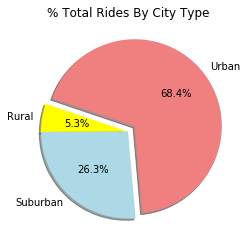

In [21]:
# Calculate Ride Percents
total_rides = merge["ride_id"].count()
total_rides_urban = urban_city["ride_id"].count()
total_rides_suburban =suburban_city["ride_id"].count()
total_rides_rural =rural_city["ride_id"].count()

percent_urban_ride = total_rides_urban/total_rides *100
percent_suburban_ride = total_rides_suburban/total_rides *100
percent_rural_ride = total_rides_rural/total_rides *100

all_rides_percent =[percent_urban_ride,percent_rural_ride,percent_suburban_ride]
explode =[0.1,0,0]
# colors = ["lightcoral","yellow","lightblue"]
# labels = ["Urban","Rural","Suburban"]

# Build Pie Chart
plt.pie(all_rides_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=275)
plt.title("% Total Rides By City Type")
# Save Figure
plt.savefig("../Images/Total Rides By City Type .png")

In [22]:
# Show Figure
plt.show()

## Total Drivers by City Type

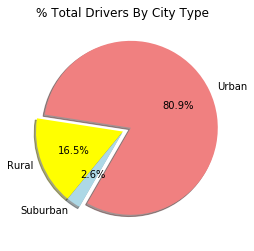

In [24]:
urban_city_1 = combined_data.loc[(combined_data["type"]== "Urban")]
suburban_city_1 = combined_data.loc[(combined_data["type"]== "Suburban")]
rural_city_1 = combined_data.loc[combined_data["type"]=="Rural"]

# Calculate Driver Percents
total_drivers = combined_data["driver_count"].sum()
total_driver_urban = urban_city_1["driver_count"].sum()
total_driver_suburban =suburban_city_1["driver_count"].sum()
total_driver_rural =rural_city_1["driver_count"].sum()

percent_drivers_urban = total_driver_urban/total_drivers *100
percent_drivers_suburban = total_driver_suburban/total_drivers *100
percent_drivers_rural = total_driver_rural/total_drivers *100


all_driver_percent =[percent_drivers_urban,percent_drivers_suburban,percent_drivers_rural]
explode =[0.1,0,0]
#colors = ["salmon","lightblue","yellow"]
#labels = ["Urban","Suburban","Rural"]
# Build Pie Charts
plt.pie(all_driver_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Total Drivers By City Type")
# Save Figure
plt.savefig("../Images/Total Drivers By City Type.png")

In [12]:
# Show Figure
plt.show()